<a href="https://colab.research.google.com/github/aerimili/EIE401-1-Multimedia/blob/main/Actividades/Actividad_1/Actividad_1_VillalobosAlejandra_20914803-K.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h1><center>

</center></h1>
<font size="6"><center>
EIE 401
PROCESAMIENTO DIGITAL MULTIMEDIA
</center></font>


<center><h2>Actividad 1</h2></center>
<center><h3>Fundamentos</h3></center>
<center><h3>Profesor: Jorge Cardenas</h3></center>

<center><h3>Por: Alejandra Villalobos</h3></center>
<center><h5>Pontificia Universidad Catolica de Valparaiso</h5></center>


## 1. Crea tu perfil y un repositorio para las actividades del curso en Github
<p align="justify">
Tanto en el mercado laboral como a nivel de investigación científica, se ha normalizado el uso de herramientas de desarrollo continuo (CI/CD), entre las que se cuenta a GitHub.

<p align="justify">
Debes crear tu cuenta y primer repositorio en GitHub.

El respositorio deberá tener un archivo README y subcarpetas para las actividades del semestre. Allí deberás alojar el archivo de Jupyter Notebook con el código y todos los recursos para la posterior revisión de tu trabajo.
    
Este medio será el canal de entrega de tus actividades cada semana, de tal forma que al final del curso debes tener un portafolio de tu trabajo para presentar a tus colegas o en la industria.
    
    

In [ ]:
# aerimili
# https://github.com/aerimili/EIE401-1-Multimedia/tree/main

## 2. Define en python vectores y funciones
<p align="justify">
Debes generar vectores que representan intervalos de tiempo o de una variable.
Debes ingresar las funciones matemáticas y evaluarlas en los vectores generados.

$$
f(x) =  e^{-x^2}
$$

$$
f(z) =  ysin(x)
$$

<p align="justify">
Haz una gráfica para cada uno de las funciones evaluadas.
    
    

In [ ]:
import numpy as np

#Creación de función 1
def function1(x):
 return np.exp(-x**2)

x = np.linspace(0, 100, 100)
fx = function1(x)

In [ ]:
#Creación de función 2
def function2(y):
  return y*np.sin(x)

y = np.linspace(0,100,100)
fy = function2(y)

Text(0, 0.5, '$ysin(x)$')

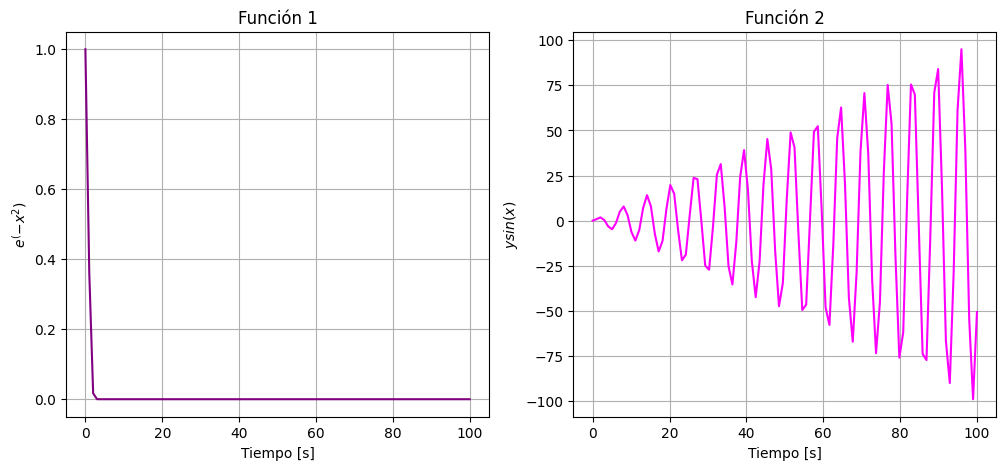

In [ ]:
import matplotlib.pyplot as plt

#Gráficas de funciones
plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
plt.plot(x,fx, color="purple")
plt.title("Función 1")
plt.grid()
plt.xlabel("Tiempo [s]")
plt.ylabel("$e^(-x^2)$")

plt.subplot(1,2,2)
plt.plot(y, fy, color="magenta")
plt.title("Función 2")
plt.grid()
plt.xlabel("Tiempo [s]")
plt.ylabel("$ysin(x)$")

## 3. Ruido
<p align="justify">
Crear una señal (senoidal, cosenoidal, etc) y demuestra la agregación de ruido.
    


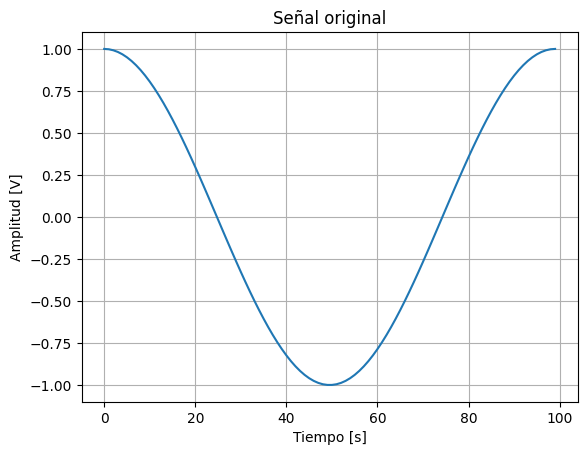

In [ ]:
#Creación de señal original cosenoidal
signal = np.cos(2*np.pi*x)
plt.plot(signal)
plt.title("Señal original")
plt.xlabel("Tiempo [s]")
plt.ylabel("Amplitud [V]")
plt.grid()

### 3.1 Ruido Gaussiano
Debes agregar la señal de ruido a la que creaste previamente. Adicionalmente, debes mostrar una gráfica con el resultado.


In [ ]:
#Creación de ruido gaussiano
gaussian_noise = np.random.normal(0,0.1,len(signal))

#Agregar ruido gaussiano a la señal original
gaussiannoise_signal = signal + gaussian_noise

Text(0, 0.5, 'Amplitud [V]')

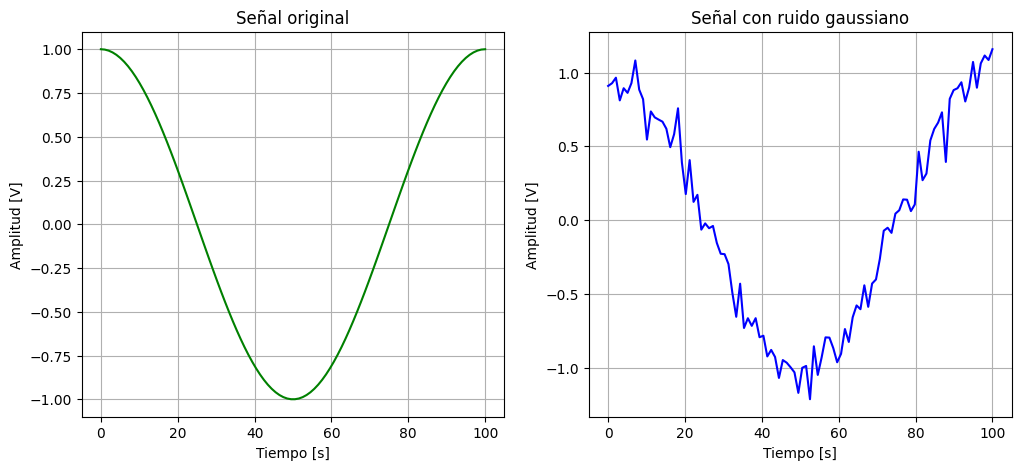

In [ ]:
#Gráficas de señal original y señal con ruido gaussiano
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.plot(x, signal, color="green")
plt.title("Señal original")
plt.grid()
plt.xlabel("Tiempo [s]")
plt.ylabel("Amplitud [V]")

plt.subplot(1,2,2)
plt.plot(x,gaussiannoise_signal, color="blue")
plt.title("Señal con ruido gaussiano")
plt.grid()
plt.xlabel("Tiempo [s]")
plt.ylabel("Amplitud [V]")

### 3.2 Ruido Rosa
Investiga en que consiste el ruido rosa, cual es la diferencia del ruido gaussiano y demuéstralo.

#### Diferencia entre ruido gaussiano y ruido rosa

* El ruido gaussiano tiene igual energía en todas las frecuencias y las amplitudes de las muestras individuales están distribuidas normalmente alrededor de una media, mientras que el ruido rosa tiene una densidad espectral que disminuye con la frecuencia y las amplitudes disminuyen proporcionalmente a la inversa de la frecuencia.  

In [ ]:
!pip install colorednoise

In [ ]:
from colorednoise import powerlaw_psd_gaussian

#Creación de ruido rosa
pink_noise = powerlaw_psd_gaussian(1, len(signal))

#Escalación del ruido rosa
pink_noise *= np.std(signal) / np.std(pink_noise)

#Agregar ruido rosa a la señal original
pinknoise_signal = signal + pink_noise

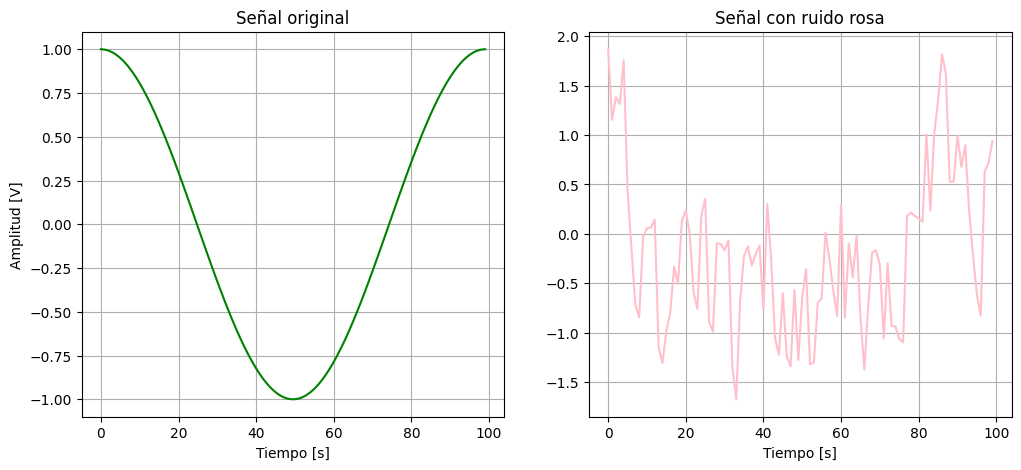

In [ ]:
#Gráfica de señal original y señal con ruido gaussiano
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.plot(signal, color="green")
plt.title("Señal original")
plt.xlabel("Tiempo [s]")
plt.ylabel("Amplitud [V]")
plt.grid()

plt.subplot(1,2,2)
plt.plot(pinknoise_signal, color="pink")
plt.title("Señal con ruido rosa")
plt.xlabel("Tiempo [s]")
plt.grid()

In [ ]:
from scipy.fft import fftfreq, fft

#Cálculo de espectro de frecuencia a cada señal creada
fs = 100
freq = fftfreq(len(signal), 1/fs)
fft_signal = fft(signal)
fft_gaussiannoisesignal = fft(gaussiannoise_signal)
fft_pinknoisesignal = fft(pinknoise_signal)

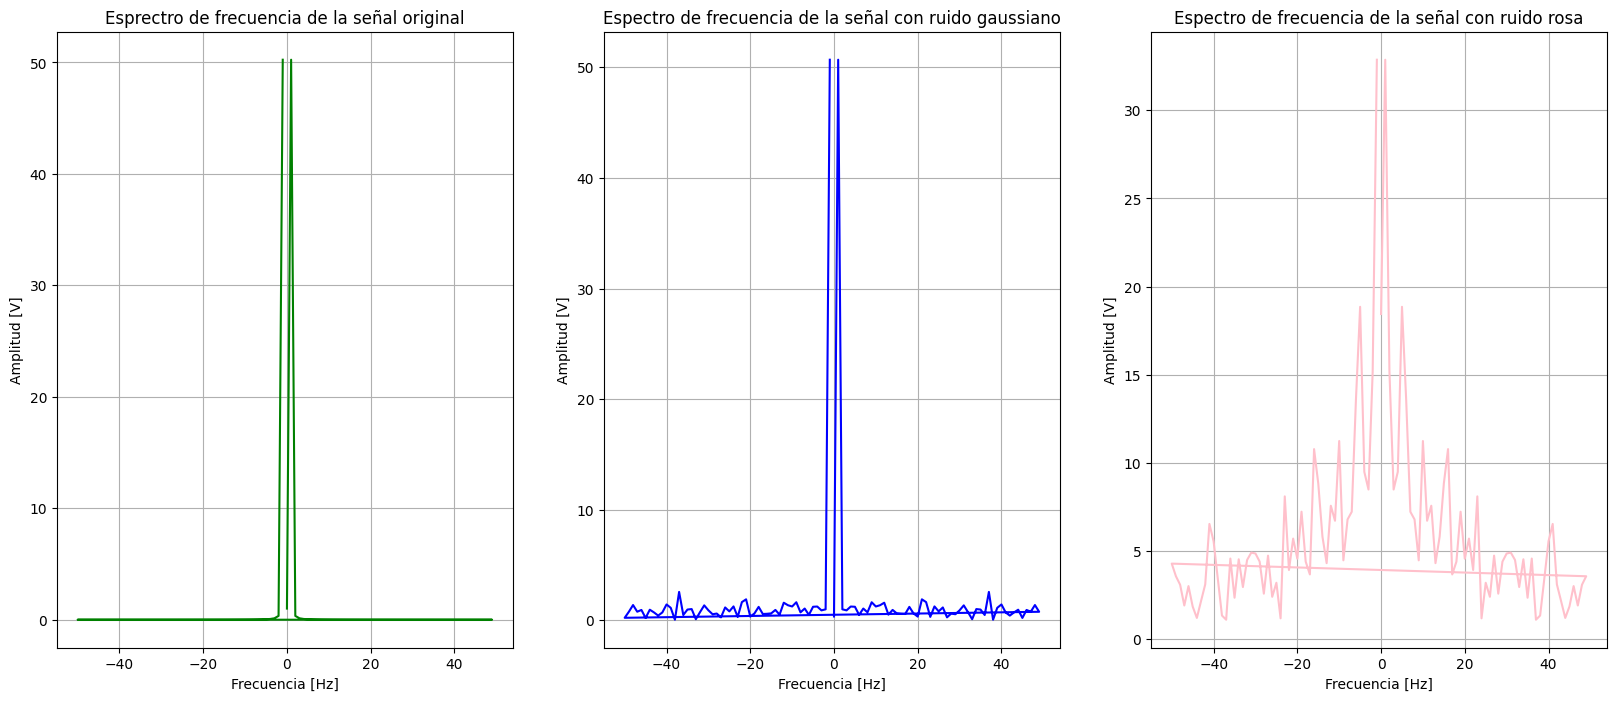

In [ ]:
#Gráfica de espectro de frecuencia de cada señal
plt.figure(figsize=(20,8))

plt.subplot(1,3,1)
plt.plot(freq, np.abs(fft_signal), "green")
plt.title("Esprectro de frecuencia de la señal original")
plt.xlabel("Frecuencia [Hz]")
plt.ylabel("Amplitud [V]")
plt.grid()

plt.subplot(1,3,2)
plt.plot(freq, np.abs(fft_gaussiannoisesignal), "blue")
plt.title("Espectro de frecuencia de la señal con ruido gaussiano")
plt.xlabel("Frecuencia [Hz]")
plt.ylabel("Amplitud [V]")
plt.grid()

plt.subplot(1,3,3)
plt.plot(freq, np.abs(fft_pinknoisesignal), "pink")
plt.title("Espectro de frecuencia de la señal con ruido rosa")
plt.xlabel("Frecuencia [Hz]")
plt.ylabel("Amplitud [V]")
plt.grid()

## 4. Referencias
<p align="justify">
    
[Generate colors of noise in Python] https://stackoverflow.com/questions/67085963/generate-colors-of-noise-in-python

[Generación de señales]https://medium.com/@martinkarlsson.io/fourier-transform-in-python-f15b3243ce9a

[Fourier Transform]https://pythonnumericalmethods.berkeley.edu/notebooks/chapter24.04-FFT-in-Python.html

[SciPy] https://docs.scipy.org/doc/scipy/tutorial/fft.html

[Fourier con numpy] https://towardsdatascience.com/fourier-transform-the-practical-python-implementation-acdd32f1b96a